### Data Preprocessing

In [1]:
import pandas as pd
from datetime import datetime

In [7]:
#import U.S. Presidents Birth and Death Information 

data = pd.read_csv("U.S. Presidents Birth and Death Information - Sheet1.csv")
data

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va."
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass."
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va."
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va."
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York"
5,John Quincy Adams,"July 11, 1767","Quincy, Mass.","Feb 23, 1848","Washington, D.C."
6,Andrew Jackson,"Mar 15, 1767","Waxhaws, No/So Carolina","June 8, 1845","Nashville, Tennessee"
7,Martin Van Buren,"Dec 5, 1782","Kinderhook, New York","July 24, 1862","Kinderhook, New York"
8,William Henry Harrison,"Feb 9, 1773","Charles City Co., Va.","Apr 4, 1841","Washington, D.C."
9,John Tyler,"Mar 29, 1790","Charles City Co., Va.","Jan 18, 1862","Richmond, Va."


In [12]:
#function to calculate lived days between two dates

def count_lived_days(row):
    birth_date = datetime.strptime(row["BIRTH DATE"], "%b %d, %Y")
    death_date = datetime.strptime(row["DEATH DATE"], "%b %d, %Y")
    return (death_date - birth_date).days

In [57]:
#Remove last row, not part of the data
df = data[:-1]

#fill nan in death date to current date (for the presidents that are still alive)
df["DEATH DATE"].fillna(datetime.now().replace(hour=0, minute=0, second=0, microsecond=0).strftime("%b %d, %Y")
, inplace=True)
df["LOCATION OF DEATH"].fillna("Alive", inplace=True)

#Calculating Additional Variables
df["year_of_birth"] = df["BIRTH DATE"].str.extract(r'\b(\d{4})\b').astype(int)
df["lived_days"] = (pd.to_datetime(df["DEATH DATE"]) - pd.to_datetime(df["BIRTH DATE"])).dt.days
df["lived_years"] = df["lived_days"] // 365
df["lived_months"] = df["lived_days"] // 30


/Users/akshaysharma/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/hy/9gqqd8391hg491d50ng36n2c0000gn/T/ipykernel_53763/3932271061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_of_birth"] = df["BIRTH DATE"].str.extract(r'\b(\d{4})\b').astype(int)
/var/folders/hy/9gqqd8391hg491d50ng36n2c0000gn/T/ipykernel_53763/3932271061.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [59]:
df.to_csv("Final_data.csv")

In [68]:
#get top 10 longest lived presidents
df_long_short = df.nlargest(10, "lived_days")
df_long_short.to_csv("top_10_longest_lived_presidents.csv")
df_long_short

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_days,lived_years,lived_months
37,Jimmy Carter,"Oct 1, 1924","Plains, Georgia","Jul 25, 2023",Alive,1924,36091,98,1203
39,George Bush,"June 12, 1924","Milton, Mass.","Nov 30, 2018","Houston, Texas",1924,34504,94,1150
36,Gerald Ford,"July 14, 1913","Omaha, Nebraska","Dec 26, 2006","Rancho Mirage, Cal.",1913,34133,93,1137
38,Ronald Reagan,"Feb 6, 1911","Tampico, Illinois","June 5, 2004","Los Angeles, Cal.",1911,34088,93,1136
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",1735,33119,90,1103
29,Herbert Hoover,"Aug 10, 1874","West Branch, Iowa","Oct 20, 1964","New York, New York",1874,32943,90,1098
31,Harry S. Truman,"May 8, 1884","Lamar, Missouri","Dec 26, 1972","Kansas City, Missouri",1884,32373,88,1079
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",1751,31150,85,1038
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",1743,30397,83,1013
35,Richard Nixon,"Jan 9, 1913","Yorba Linda, Cal.","Apr 22, 1994","New York, New York",1913,29688,81,989


In [69]:
#get top 10 shortest lived presidents
df_short_long = df.nsmallest(10, "lived_days")
df_short_long.to_csv("top_10_shortest_lived_presidents.csv")
df_short_long

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_days,lived_years,lived_months
33,John F. Kennedy,"May 29, 1917","Brookline, Mass.","Nov 22, 1963","Dallas, Texas",1917,16978,46,565
19,James A. Garfield,"Nov 19, 1831","Cuyahoga Co., Ohio","Sep 19, 1881","Elberon, New Jersey",1831,18202,49,606
10,James K. Polk,"Nov 2, 1795","Mecklenburg Co., N.C.","June 15, 1849","Nashville, Tennessee",1795,19583,53,652
15,Abraham Lincoln,"Feb 12, 1809","LaRue Co., Kentucky","Apr 15, 1865","Washington, D.C.",1809,20516,56,683
20,Chester Arthur,"Oct 5, 1829","Fairfield, Vermont","Nov 18, 1886","New York, New York",1829,20863,57,695
27,Warren G. Harding,"Nov 2, 1865","Morrow County, Ohio","Aug 2, 1923","San Francisco, Cal.",1865,21091,57,703
23,William McKinley,"Jan 29, 1843","Niles, Ohio","Sep 14, 1901","Buffalo, New York",1843,21412,58,713
24,Theodore Roosevelt,"Oct 27, 1858","New York, New York","Jan 6, 1919","Oyster Bay, New York",1858,21985,60,732
28,Calvin Coolidge,"July 4, 1872","Plymouth, Vermont","Jan 5, 1933","Northampton, Mass.",1872,22099,60,736
42,Barack Obama,"Aug 4, 1961","Honolulu, Hawaii","Jul 25, 2023",Alive,1961,22635,62,754


### Calculating Useful Measures

In [74]:
# Calculate statistics for lived_days
mean_lived_days = df["lived_days"].mean()
weighted_average_lived_days = df["lived_days"].sum() / df["lived_days"].count()
median_lived_days = df["lived_days"].median()
mode_lived_days = df["lived_days"].mode().values[0]
max_lived_days = df["lived_days"].max()
min_lived_days = df["lived_days"].min()
std_lived_days = df["lived_days"].std()

# Output statistics as a DataFrame
statistics_df = pd.DataFrame({
    "Statistic": ["Mean", "Weighted Average", "Median", "Mode", "Max", "Min", "Standard Deviation"],
    "Lived Days": [mean_lived_days, weighted_average_lived_days, median_lived_days, mode_lived_days, max_lived_days, min_lived_days, std_lived_days]
})
statistics_df

,Statistic,Lived Days
0,Mean,26453.111111
1,Weighted Average,26453.111111
2,Median,26227.000000
3,Mode,16978.000000
4,Max,36091.000000
5,Min,16978.000000
6,Standard Deviation,4604.084023


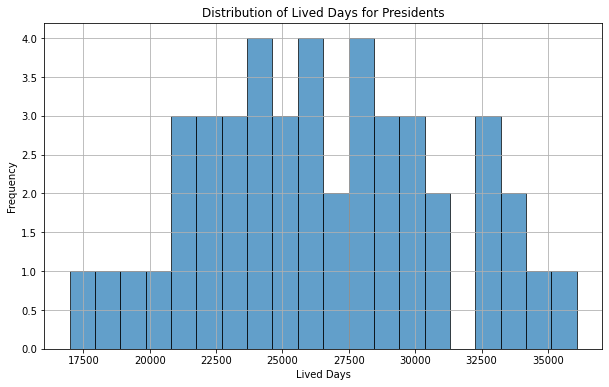

In [72]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df["lived_days"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Lived Days")
plt.ylabel("Frequency")
plt.title("Distribution of Lived Days for Presidents")
plt.grid(True)
plt.show()